<a href="https://colab.research.google.com/github/ramun9533/Proyecto_Final_curso_pythpn/blob/main/Proyecto_Final_(%5E_%5E).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

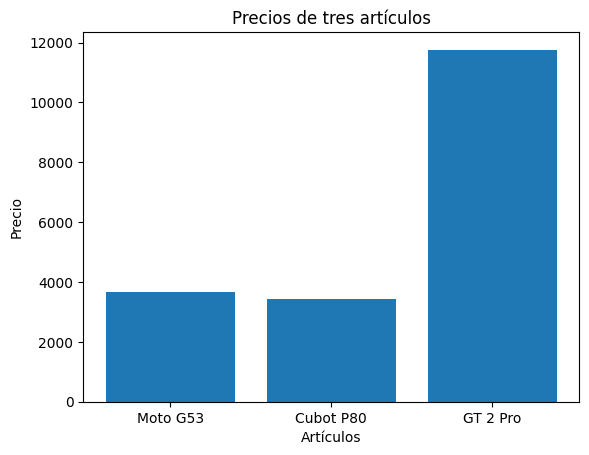

In [1]:
# Se importan las librerias necesarias para hacer peticiones al sitio en iternet
# y para poder hacerla grafica
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
# SE crea la funcion "mameluco" que obtiene la cada elemento de la
# lsita de las urls
def mameluco(url):
    # Accede a las paginas y las lee con "requests.get(url)"", luego guarda el
    # codigo en page
    page = requests.get(url)
    # Divide el codigo de las paginas en partes con:
    # "BeautifulSoup(page.content, 'html.parser')"" y lo guarda en la variable
    # "soup"
    soup = BeautifulSoup(page.content, 'html.parser')
    # El método "find()" de "BeautifulSoup" se utiliza para buscar el primer
    # elemento que cumple las condiciones en el HTML. Se busca "span" que
    # contenga atributo "class" y valor "andes-money-amount__fraction", dicho
    # elemento al ser localizado se guarda en la variable "span_tag"(string)
    span_tag = soup.find('span', attrs={"class": "andes-money-amount__fraction"})
    # Eliminamos la coma del precio para poder convertirlo a un entero
    price_str = span_tag.text.replace(',', '')
    # retornamos la conversion a entero de la variable "price_str"
    return int(price_str)

# Lista de URL's de los artículos a analizar
urls = [
    'https://www.mercadolibre.com.mx/motorola-moto-g53-8-gb-128-gb-65/p/MLM22947162?pdp_filters=category:MLM1055#searchVariation=MLM22947162&position=3&search_layout=stack&type=product&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171',
    'https://articulo.mercadolibre.com.mx/MLM-2003591282-celular-cubot-p80-dual-sim-256-gb-global-8-gb-ram-5200mah-android-13-_JM#position=45&search_layout=stack&type=item&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171',
    'https://www.mercadolibre.com.mx/realme-gt-2-pro-dual-sim-256-gb-steel-black-12-gb-ram/p/MLM19130693?pdp_filters=item_id:MLM1507221033#is_advertising=true&searchVariation=MLM19130693&position=9&search_layout=stack&type=pad&tracking_id=d7676704-bae0-4c80-8d25-29fa31f1b171&is_advertising=true&ad_domain=VQCATCORE_LST&ad_position=9&ad_click_id=MjMzNjkyN2QtZmI2MC00ZDAzLWJiZDUtZGQ1OWI5NWU0MWFl'
]

# Se obtiene los precios de los artículos por medio de un "for" que manda
# cada elemento de la lista "urls" a la funcion "mameluco"
precios = [mameluco(url) for url in urls]
#print('hola',urls)
# Datos de los nombres de los artículos
articulos = ['Moto G53', 'Cubot P80', 'GT 2 Pro']

# Crear la gráfica de barras
plt.bar(articulos, precios)

# Etiquetas del eje x
plt.xlabel('Artículos')

# Etiquetas del eje y
plt.ylabel('Precio')

# Título del gráfico
plt.title('Precios de tres artículos')

# Mostrar el gráfico
plt.show()
